# **Nonlinear Regression in a nutshell**

by Felix Fritzen <fritzen@simtech.uni-stuttgart.de>, November 2020

additional material for the course _Data processing for engineers and scientists_ at the University of Stuttgart

## Content

### Part 1: regression using feature maps
- general explanation
- example for polynomial regression

### Part 2: nonlinear regression using transforms
- examples for hyperbolas and exponential decay


## Part 1: regression using feature maps


## **Objective**
**given:** samples $$(x_i, y_i)$$ determine the best **nonlinear** approximation
$$\widehat{y} = \underline{\mu}^\mathsf{T} \underline{\psi}(x)$$
with $\underline{\psi}:\, \mathbb{R} \mapsto \mathbb{R}^m$ a *feature map* (see also kernel methods later on!) and $\underline{\mu}\in\mathbb{R}^m$ a set of real valued coefficients

**seek:** optimal approximation regarding the mean squared error
$$\underline{\mu} = \text{arg min} \sum_{i=1}^n  ( \underline{\mu}^\mathsf{T} \underline{\psi}_i - y_i )^2 \qquad \text{with }\underline{\psi}_i = \underline{\psi}(x_i)$$

In [1]:
import numpy as np
import numpy.linalg as LA
import numpy.random as rnd

import datetime
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'], 'size':14})


### Algorithm

- for all samples compute the feature vectors $\underline{\psi}_i=\underline{\psi}(x)$ and store them as rows of $\underline{\underline{\Psi}} \in\mathbb{R}^{n \times m}$
- compute the matrix $\underline{\underline{M}}$ and the vector $\underline{v}$
$$\underline{\underline{M}} = \underline{\underline{\Psi}}^\mathsf{T} \underline{\underline{\Psi}}, \qquad
\underline{v} = \underline{\underline{\Psi}}^\mathsf{T} \underline{y}$$
- determine $\underline{\mu}$ via
$$\underline{\mu} = \underline{\underline{M}}^{-1} \underline{v}$$

In [2]:
def polynomial_regression( x, y, p=1):
    """
    Perform polynomial regression of order p>=0 for given tuples (x_i, y_i)
    
    Parameteres:
    x (float, numpy.array):     data for x (same size as y)
    y (float, numpy.array):     data for y (same size as x)
    p (int):                    polynomial order (>= 0)
    
    Returns:
    vector of polynomial coefficients, pointwise error and MSE
    
    """
    n = x.shape[0]
    assert(y.shape[0]==n)
    assert(p>=0)
    PSI = np.zeros( (n, p+1) )
    for j in np.arange(p+1):
        PSI[:,j] = x**j
    M = PSI.T @ PSI
    v = PSI.T @ y
    mu= LA.solve(M, v)
    
    err = PSI@mu - y
    MSE = np.linalg.norm(err)**2 / n
    
    return mu, err, MSE
    
        

### Example 1: fitting a cubic polynomial

Let a cubic polynomial be given by
$$f(x) = x^2 + x^3 - 2$$
The data is given by $f(x)$ and white noise with amplitude $\sigma$:
$$y \gets f(x) + \mathcal{N}( 0, \sigma^2 )$$

#### objectives
- demonstrate that for $p=3$ and $\sigma=0$ the exact polynomial is found
- demonstrate that (independent of $\sigma$!) the MSE must decrease with increasing polynomial order $p$

#### voluntary tasks
- prove that $\underline{\underline{M}}$ is symmetric and positive semi-definite and, therefore, the stationary point is a minimum
- prove the above statements
- illustrate disadvantages of high polynomial order by means of examples
- show that the described method delivers the same result as the linear regression model (see `DaPro_linear_regression.ipynb`)


-----------------------------------------------------------------------------------------
sigma =   0.0000, n = 50
p=1, MSE:  0.113359 - polynomial coeff.:  [-1.6859  0.5849]
p=2, MSE:  0.018416 - polynomial coeff.:  [-2.0160  0.5704  1.0822]
p=3, MSE:  0.000000 - polynomial coeff.:  [-2.0000  0.0000  1.0000  1.0000]
p=4, MSE:  0.000000 - polynomial coeff.:  [-2.0000  0.0000  1.0000  1.0000  0.0000]
-----------------------------------------------------------------------------------------
sigma =   0.0750, n = 50
p=1, MSE:  0.098511 - polynomial coeff.:  [-1.6899  0.6081]
p=2, MSE:  0.024277 - polynomial coeff.:  [-1.9838  0.5785  0.9449]
p=3, MSE:  0.005295 - polynomial coeff.:  [-1.9859 -0.0200  0.9298  1.0343]
p=4, MSE:  0.005243 - polynomial coeff.:  [-1.9791 -0.0247  0.8490  1.0418  0.1018]
-----------------------------------------------------------------------------------------


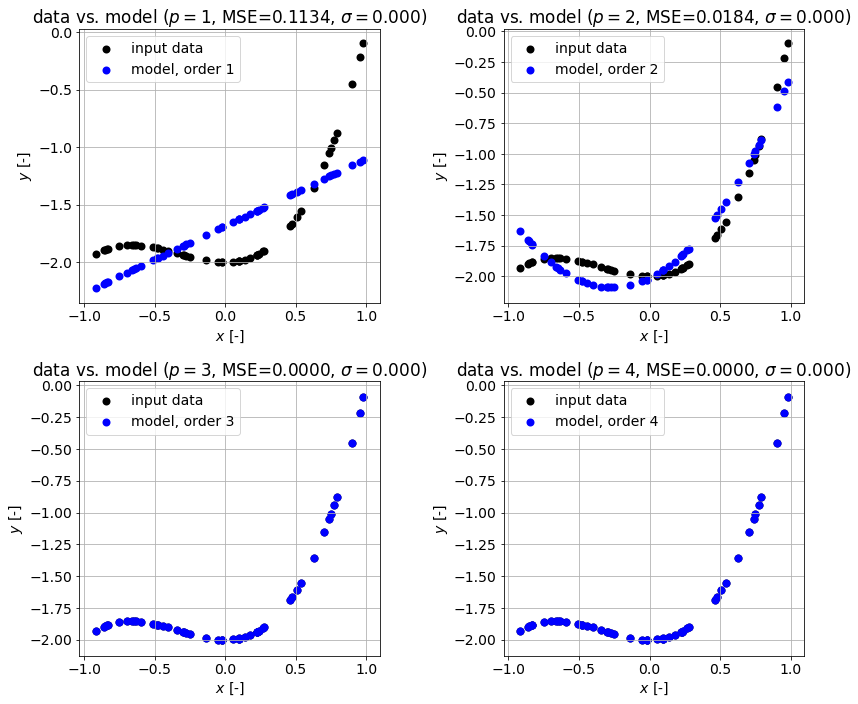

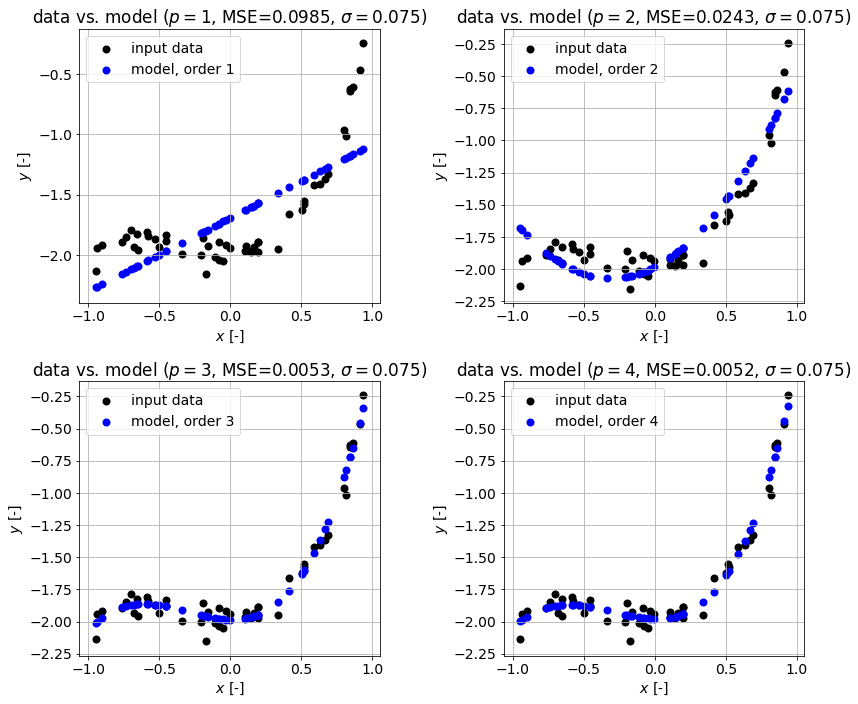

In [3]:
# polynomial for the input data
f = lambda x : x*x + x**3 - 2

# number of samples
n = 50

# magnitude of white noise
print('-----------------------------------------------------------------------------------------')
for sig in [0.00, 0.075]:
    print('sigma = %8.4f, n = %d' % (sig, n) )

    # either uniform point seed OR random points:
    #x = np.linspace(-1,1,n)
    x = np.random.uniform(-1, 1, size=n)

    # data
    y = f(x) + np.random.normal( loc=0, scale=sig, size=n )

    fig, ax = plt.subplots(2,2,figsize=(12,10))
    ax = ax.flatten()
    # fit polynomial for order p=1..4 --> MSE must decrease monotonically!
    for p in np.arange(1,5):
        mu, err, MSE = polynomial_regression(x, y, p=p)
        print('p=%d, MSE: %9.6f - polynomial coeff.: ' % (p, MSE), \
              np.array2string(mu, formatter={'float_kind':lambda x: "%7.4f" % x}))
        PSI = np.zeros( (n, p+1) )
        for j in range(p+1):
            PSI[:,j] = x[:]**j
        z = PSI@mu
        ax[p-1].scatter( x, y, color='black', linewidth=2, label='input data' )
        ax[p-1].scatter( x, z, color='blue', linewidth=2, label=('model, order %d' % p) )
        ax[p-1].set_xlabel('$x$ [-]')
        ax[p-1].set_ylabel('$y$ [-]')
        ax[p-1].set_title('data vs. model ($p=$%d, MSE=%.4f, $\sigma=$%.3f)' % (p, MSE, sig))
        ax[p-1].grid()
        ax[p-1].legend()
    print('-----------------------------------------------------------------------------------------')

    fig.tight_layout()


## Part 2: nonlinear regression using transforms

### Ansatz

Let the model be nonlinear, e.g.
$$ y = \frac{1}{\mu_1 x + \mu_2 }\qquad\text{or}\qquad y= \mu_1 \, \exp (- \mu_2 x )$$

Clearly this model cannot be captured by the feature maps of Part 1

**Partial solution**
- transform $y \to y_*$ or/and $x \to x_*$ or/and $\mu \to \mu_*$
- if the relation between $x$ and $y$ is bijective, then a transformation exists such that there exists a transformation allowing to rewrite the regression in terms of a linear model

**Remarks**
- there is no general algorithm available
- the linear regression model can lead to suboptimal solutions, if $y$ is transformed nonlinearly; then the MSE of the transformed model is (in general) different from the MSE of the original model and the optimum w.r.t. to $\underline{\mu}$ can be different

### Example 2.1: hyperbola

Model
$$ y = \frac{1}{\mu_1 x + \mu_2 } $$
Transform
$$ y_* = \frac{1}{y} = \mu_1 x + \mu_2$$
$\blacktriangleright$ this is a linear model with parameters $\mu_1, \mu_2$

### Example 2.2: exponential decay

Model
$$ y = \mu_1 \, \exp ( -  \mu_2x ) $$
Transform
$$ y_* = \log(\mu_1) - \mu_2 \, x$$
$\blacktriangleright$ this is a linear model with parameters $\mu_{1*}=\log(\mu_1), \mu_{2*} = -\mu_2$

### ATTENTION
- the transform of noisy data can be undefined (e.g., example 2.2 with some noise)
- a forward and a backward transform function suffice to allow for the linear model to work




hyperbola    - MSE:   0.0033 (on actual y data)
exp. decay   - MSE:      nan (on actual y data)


<ipython-input-4-80a61ebd09f1>:38: RuntimeWarning: invalid value encountered in log
  z = np.log(y)


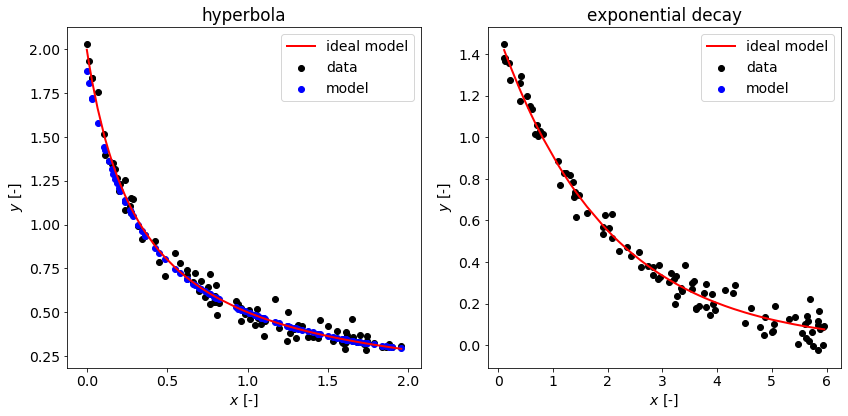

In [4]:
a = 1.5
b = 0.5
f = lambda x : 1/(a*x+b)
n = 100
x = np.random.uniform(0, 2, size=n)
x = np.sort(x)
sig = 0.05
y = f(x) + np.random.normal(loc=0, scale=sig, size=n)

# transform the data
z = 1/y
mu, err, MSE = polynomial_regression(x, z, p=1)
z_tilde = err + z
y_tilde = 1/z_tilde
MSE_y = np.linalg.norm( y_tilde-y )**2/n
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].scatter(x,y,color='black',label='data')
ax[0].scatter(x,y_tilde,color='blue', label='model')
ax[0].plot(x,1/(a*x+b),color='red', linewidth=2, label='ideal model')
ax[0].set_title('hyperbola')
ax[0].set_xlabel('$x$ [-]')
ax[0].set_ylabel('$y$ [-]')
ax[0].legend()

print('hyperbola    - MSE: %8.4f (on actual y data)' % MSE_y)


a = 1.5
b = 0.5
f = lambda x : a*np.exp(-b*x)
n = 100
x = np.random.uniform(0, 6, size=n)
x = np.sort(x)
sig = 0.05
y = f(x) + np.random.normal(loc=0, scale=sig, size=n)

# transform the data
z = np.log(y)
mu, err, MSE = polynomial_regression(x, z, p=1)
z_tilde = err + z
y_tilde = np.exp(z_tilde)
MSE_y = np.linalg.norm( y_tilde-y )**2/n
ax[1].scatter(x,y,color='black',label='data')
ax[1].scatter(x,y_tilde,color='blue', label='model')
ax[1].plot(x,a*np.exp(-b*x),color='red', linewidth=2, label='ideal model')
ax[1].set_title('exponential decay')
ax[1].set_xlabel('$x$ [-]')
ax[1].set_ylabel('$y$ [-]')
ax[1].legend()

print('exp. decay   - MSE: %8.4f (on actual y data)' %  MSE_y)

fig.tight_layout()


### voluntary homework
- find real world data
- select a model appearing suitable for the data (better: several models)
- perform the regression
- if multiple models are considered: select the optimal model (i.e. simplest, yet accurate one)
- verify the model's accuracy; therefore: (a) split the data into training and testing data; (b) perform regression using testing data only; (c) verify that the MSE for the validation data is comparable